In [2]:
# Importe les biblios
import requests
import os
import zipfile
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#telechargement données et mise en biblio fichier 2020-22
#biblio 2020_21
df_immo_2020= pd.read_excel(r"C:\Users\paul4\OneDrive\Bureau\PREING 2\S2\ECO URBAINE S4\PROJET\prix_volumes\Prix_foncier_20_22\dv3f_prix_volumes_communes_2020_2022.xlsx")
df_immo_2020

,codgeo,libgeo,nbtrans_cod1,valeurfonc_sum_cod1
0,01001,L'Abergement-Clémenciat,29,7.737857e+06
1,01002,L'Abergement-de-Varey,10,NaN
2,01004,Ambérieu-en-Bugey,868,2.305088e+08
3,01005,Ambérieux-en-Dombes,100,3.242777e+07
4,01006,Ambléon,10,NaN
...,...,...,...,...
33353,97420,Sainte-Suzanne,260,9.886736e+07
33354,97421,Salazie,60,1.171091e+07
33355,97422,Le Tampon,2005,4.480199e+08
33356,97423,Les Trois-Bassins,106,2.815964e+07


In [5]:
print(df_immo_2020.columns)

Index(['codgeo', 'libgeo', 'nbtrans_cod1', 'valeurfonc_sum_cod1'], dtype='object')


In [8]:
# YA PASS DE 'CODGEO' DAANS LE SHP
# Charger le fichier géographique
communes_shapefile = r"C:\Users\paul4\OneDrive\Bureau\PREING 2\S2\ECO URBAINE S4\PROJET\COMMUNE.shp"
communes_gdf = gpd.read_file(communes_shapefile)

communes_gdf


,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,geometry
0,COMMUNE_0000000009750662,Villy-le-Pelloux,VILLY-LE-PELLOUX,74307,Commune simple,996,11,3,74,84,247400112,"POLYGON ((6.12476 45.99346, 6.12468 45.99377, ..."
1,COMMUNE_0000000009750663,Cuvat,CUVAT,74098,Commune simple,1611,11,3,74,84,247400112,"POLYGON ((6.12230 45.98391, 6.12228 45.98383, ..."
2,COMMUNE_0000002324290058,Tourneville-sur-Mer,TOURNEVILLE-SUR-MER,50272,Commune simple,1663,20,3,50,28,200067023,"POLYGON ((-1.49950 48.95587, -1.49929 48.95526..."
3,COMMUNE_0000002324290057,Mansle-les-Fontaines,MANSLE-LES-FONTAINES,16206,Commune simple,2105,05,3,16,75,200072023,"POLYGON ((0.19988 45.90931, 0.19982 45.90919, ..."
4,COMMUNE_0000002324290056,Bézac,BEZAC,09056,Commune simple,467,07,2,09,76,200066231,"POLYGON ((1.56825 43.14113, 1.56817 43.14126, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
34930,COMMUNE_0000001369858501,Kourou,KOUROU,97304,Commune simple,24612,NR,1,973,03,200027548,"POLYGON ((-52.62763 5.15820, -52.62824 5.15854..."
34931,COMMUNE_0000001369858490,Ouanary,OUANARY,97314,Commune simple,251,NR,3,973,03,249730052,"POLYGON ((-51.96297 4.00367, -51.96300 4.00402..."
34932,COMMUNE_0000001369858514,Maripasoula,MARIPASOULA,97353,Commune simple,9177,NR,2,973,03,249730037,"POLYGON ((-54.16698 3.22242, -54.16685 3.22309..."
34933,COMMUNE_0000001369858499,Sinnamary,SINNAMARY,97312,Commune simple,2830,NR,1,973,03,200027548,"MULTIPOLYGON (((-53.21249 5.01254, -53.21230 5..."


<Axes: >

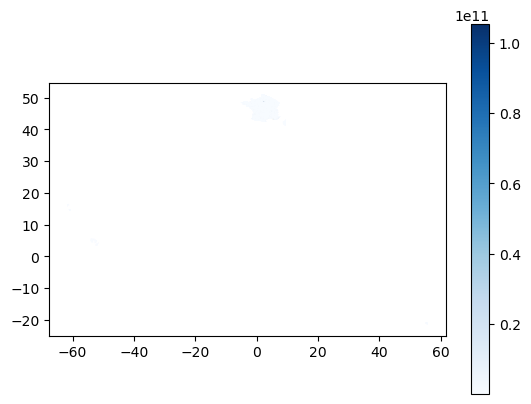

In [12]:
# Fusionner les données du DataFrame avec les données géographiques
merged_gdf = communes_gdf.merge(df_immo_2020, how='inner', left_on='NOM', right_on='libgeo')

# Créer la figure et les axes
fig, ax = plt.subplots(1, 1)

# Tracer les données
merged_gdf.plot(ax=ax, column='valeurfonc_sum_cod1', cmap='Blues', legend=True)
